# Doctor Fees Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [6]:
df_fees_test=pd.read_csv("doctor_fee_Test.csv", sep=",")

In [7]:
df_fees_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [8]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [9]:
df_train = pd.read_csv('doctor_fee_Train.csv', encoding='ISO-8859–1')

In [10]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [11]:
#Combining train and test datasets
df_fees=df_train.append(df_fees_test)

In [12]:
df_fees

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ?250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


In [13]:
df_fees.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Experience','Rating','Place','Qualification']
for val in list1:
    df_fees[val]=le.fit_transform(df_fees[val].astype(str))

In [15]:
df_fees

,Experience,Fees,Place,Profile,Qualification,Rating
0,16,100.0,327,Homeopath,491,0
1,3,350.0,936,Ayurveda,92,50
2,63,300.0,499,ENT Specialist,1442,52
3,3,250.0,74,Ayurveda,572,52
4,12,250.0,369,Ayurveda,16,0
...,...,...,...,...,...,...
1982,1,NaN,76,Ayurveda,64,52
1983,33,NaN,135,Dermatologists,1561,52
1984,63,NaN,664,General Medicine,1344,52
1985,3,NaN,34,Dentist,168,50


In [16]:
#Converting all categorical values into numerical
df_fees=pd.get_dummies(df_fees)
df_fees

,Experience,Fees,Place,Qualification,Rating,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,16,100.0,327,491,0,0,0,0,0,0,1
1,3,350.0,936,92,50,1,0,0,0,0,0
2,63,300.0,499,1442,52,0,0,0,1,0,0
3,3,250.0,74,572,52,1,0,0,0,0,0
4,12,250.0,369,16,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1982,1,NaN,76,64,52,1,0,0,0,0,0
1983,33,NaN,135,1561,52,0,0,1,0,0,0
1984,63,NaN,664,1344,52,0,0,0,0,1,0
1985,3,NaN,34,168,50,0,1,0,0,0,0


In [17]:
#Removing null values from dataset
df_fees.replace(np.NaN, 0, inplace=True)

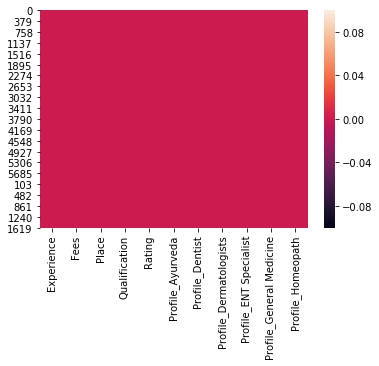

In [18]:
#nonull values present
sns.heatmap(df_fees.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E1DB724688>,
      dtype=object)

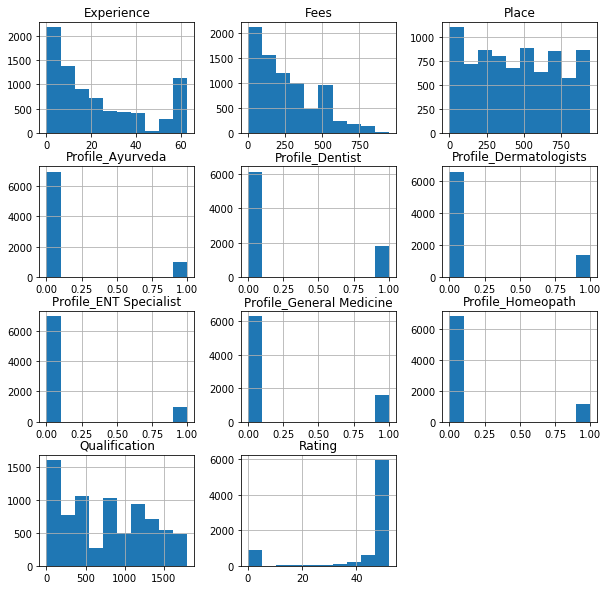

In [19]:
df_fees.hist(figsize=(10,10))

In [20]:
df_fees.describe()

,Experience,Fees,Place,Qualification,Rating,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,23.004278,230.958480,453.344112,756.032461,43.666457,0.130473,0.231253,0.172748,0.121163,0.203447,0.140916
std,20.890855,212.413839,282.194640,525.721528,16.643974,0.336844,0.421660,0.378053,0.326337,0.402588,0.347957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.750000,214.750000,284.750000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,200.000000,449.000000,749.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,400.000000,687.000000,1193.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,63.000000,950.000000,948.000000,1800.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_fees.skew()

Experience                  0.826304
Fees                        0.782582
Place                       0.104400
Qualification               0.247541
Rating                     -2.060924
Profile_Ayurveda            2.194604
Profile_Dentist             1.275028
Profile_Dermatologists      1.731686
Profile_ENT Specialist      2.322343
Profile_General Medicine    1.473603
Profile_Homeopath           2.064478
dtype: float64

In [22]:
import numpy as np
for col in df_fees.columns:
    if df_fees.skew().loc[col]>0.55:
        df_fees[col]=np.log1p(df_fees[col])

In [23]:
from scipy.stats import zscore
z_score=abs(zscore(df_fees))
print(df_fees.shape)
df_fees_final=df_fees.loc[(z_score<3).all(axis=1)]
print(df_fees_final.shape)

(7948, 11)
(7948, 11)


In [24]:
x=df_fees.drop(columns=["Fees"])
y=df_fees[["Fees"]]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print()
    print()
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [26]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42  is:  0.003940785376842393
r2_score corresponding to random state:  43  is:  0.00573624966107078
r2_score corresponding to random state:  44  is:  0.0016117088522074052
r2_score corresponding to random state:  45  is:  -0.0006905417619376131
r2_score corresponding to random state:  46  is:  -0.004022410873993243
r2_score corresponding to random state:  47  is:  0.004489447190981988
r2_score corresponding to random state:  48  is:  0.005048281110476949
r2_score corresponding to random state:  49  is:  0.0028869438301507566
r2_score corresponding to random state:  50  is:  0.001782386404063363
r2_score corresponding to random state:  51  is:  0.002417636696048553
r2_score corresponding to random state:  52  is:  -0.0049672237320459445
r2_score corresponding to random state:  53  is:  0.008793037276688787
r2_score corresponding to random state:  54  is:  0.0036021299998331147
r2_score corresponding to random state:  55  is:  0.003045377652510783

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

knr=KNeighborsRegressor(n_neighbors=29)

r_state=maxr2_score(knr,x,y)

# Max r2 score for KNN Regression corresponds  to 87

In [30]:

from sklearn.model_selection import cross_val_score

In [31]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNR Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  -3.8501397596115474
Standard Deviation in r2 score for Linear Regression:  3.147943521216995

Mean r2 score for KNN Regression:  -4.165476512534237
standard deviation in r2 score for KNR Regression:  3.393980020951351


In [33]:
#Lasso Regression
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [34]:
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state:  42  is:  0.0036631046756735453
r2_score corresponding to random state:  43  is:  0.0056504117092121
r2_score corresponding to random state:  44  is:  0.0016118627824679432
r2_score corresponding to random state:  45  is:  -0.0007429642754968047
r2_score corresponding to random state:  46  is:  -0.004014427552222477
r2_score corresponding to random state:  47  is:  0.004467498542135129
r2_score corresponding to random state:  48  is:  0.004887203922503969
r2_score corresponding to random state:  49  is:  0.002682499871208277
r2_score corresponding to random state:  50  is:  0.0017670206924504939
r2_score corresponding to random state:  51  is:  0.0024723623373511527
r2_score corresponding to random state:  52  is:  -0.00435739713345118
r2_score corresponding to random state:  53  is:  0.008535879643062794
r2_score corresponding to random state:  54  is:  0.0037442624021075677
r2_score corresponding to random state:  55  is:  0.003216213904403742


In [35]:
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -3.85138391944389
standard deviation in r2 score for Lasso Regression:  3.149052225597023


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [41]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=1000)
print("Mean r2 score for GradientBoosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for GradientBoosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for GradientBoosting Regression:  -3.87677859855775
standard deviation in r2 score for GradientBoosting Regression:  3.169778227318543


In [32]:
#Let's save KNN regression with random state corresponding to r2 score 87
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 87, test_size = 0.30)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [33]:
#Calculate RMSE and r2 score
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2.654640603524437
r2_score is:  -0.16745500152130322


In [34]:
#Saving the KNR regression model
from joblib import dump, load
dump(knr, 'Doctor_Fees.joblib')

['Doctor_Fees.joblib']